In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\MansiJadhav\\Python-for-Machine-Learning-&-Data-Science-Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
X = df.drop('sales', axis=1)

In [4]:
y = df['sales']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
test_predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [13]:
mean_squared_error(y_test, test_predictions)

2.2987166978863773

In [14]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [15]:
test_residuals = y_test - test_predictions

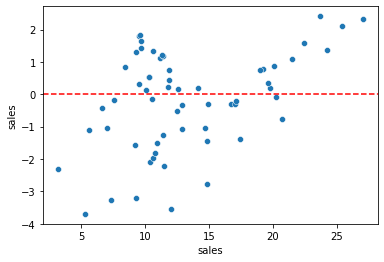

In [16]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')    # Draws a horizontal line along that axis

# There is no clear line or curve - It's random
# Distibution around 0
# Hence it's ok to use linear regression

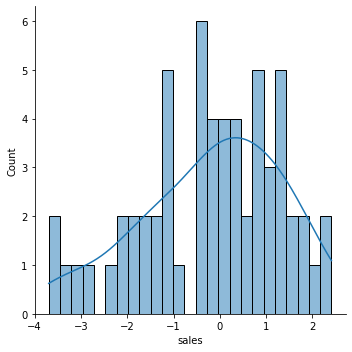

In [17]:
sns.displot(test_residuals, bins=25, kde=True)
# Normal distribution of residuals

In [18]:
# Model Deployment

In [19]:
final_model = LinearRegression()

In [21]:
final_model.fit(X,y)

LinearRegression()

In [25]:
final_model.coef_

# Returns the beta coefficients for TV, radio and newspaper spend
# Eg. 0.45 means for one unit increment in TV spend (radio and newspaper fixed), 0.45 unit increment in sales
# Note that newspaper spend is almost zero - Spend does not really alter the sales

array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
y_hat = final_model.predict(X)

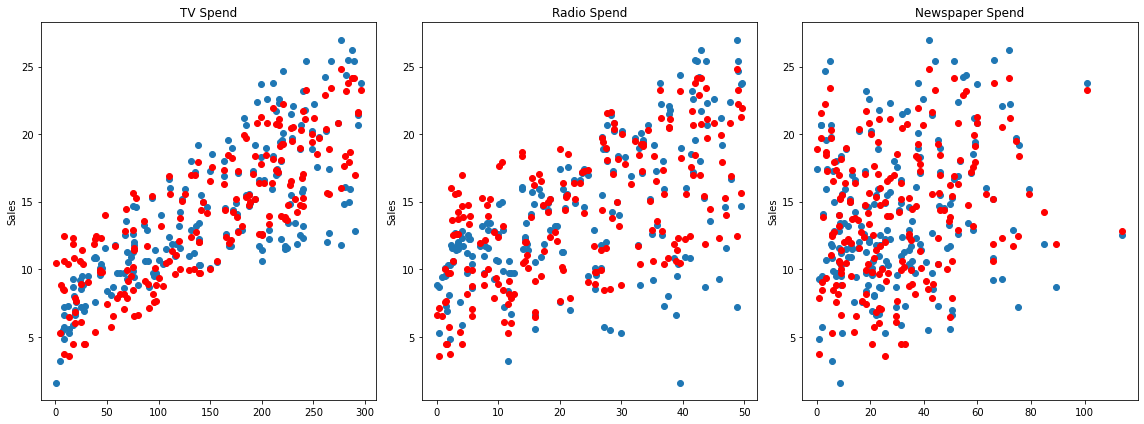

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [30]:
from joblib import dump, load         # dump - save the model

In [31]:
dump(final_model, 'final_sales_model.joblib')  # Save the model as final_sales_model.joblib

['final_sales_model.joblib']

In [32]:
loaded_model = load('final_sales_model.joblib')

In [34]:
loaded_model.coef_         # Final trained model that can be used to predict values

array([ 0.04576465,  0.18853002, -0.00103749])

In [35]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales???
campaign = [[149, 22, 12]]

In [36]:
loaded_model.predict(campaign)       # Use the loaded model to predict sales

array([13.893032])